In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [26]:
df = pd.read_csv(r'F:\AppliedDataScience\datasets\Electric_Production.csv')

In [27]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [28]:
len(df)

397

In [29]:
df2 = df

In [30]:
df2 = df2.dropna()

In [31]:
len(df2)

397

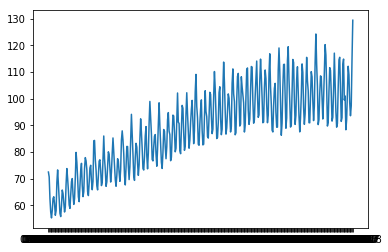

In [4]:
y = plt.plot(df['DATE'],df['Value'])
plt.show()

In [5]:
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [24]:
df.index = pd.DatetimeIndex(freq="w",start = 0,periods = 397)
df.head()

,DATE,Value
1970-01-04,01-01-1985,72.5052
1970-01-11,02-01-1985,70.6720
1970-01-18,03-01-1985,62.4502
1970-01-25,04-01-1985,57.4714
1970-02-01,05-01-1985,55.3151


In [7]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [11]:
X1 = df[['DATE']]
X1_array = X1.values

In [13]:
y1 = df[['Value']]
y1_array = y1.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X1_array, y1_array, test_size=0.15, random_state=1)

In [34]:
mod = sm.tsa.statespace.SARIMAX(y_train)
results = mod.fit()

In [35]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9709      0.013     72.581      0.000       0.945       0.997
sigma2       459.3127     40.971     11.211      0.000     379.011     539.615


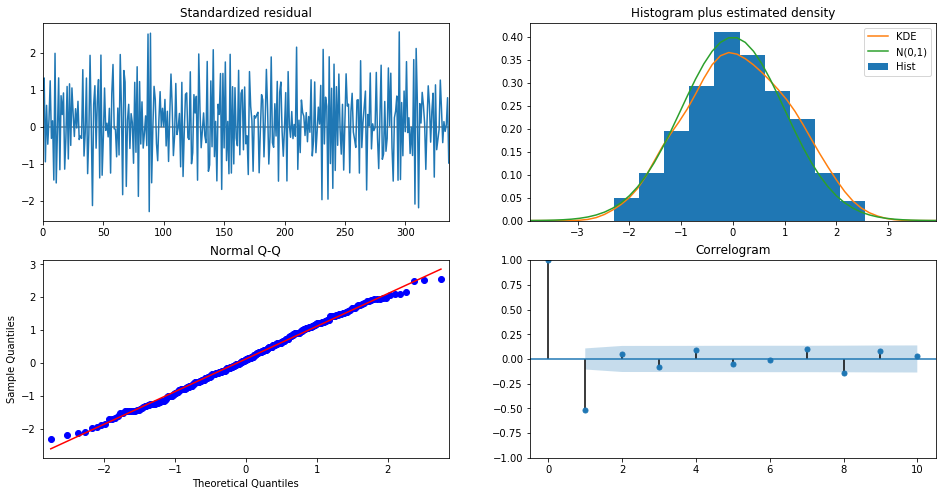

In [36]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

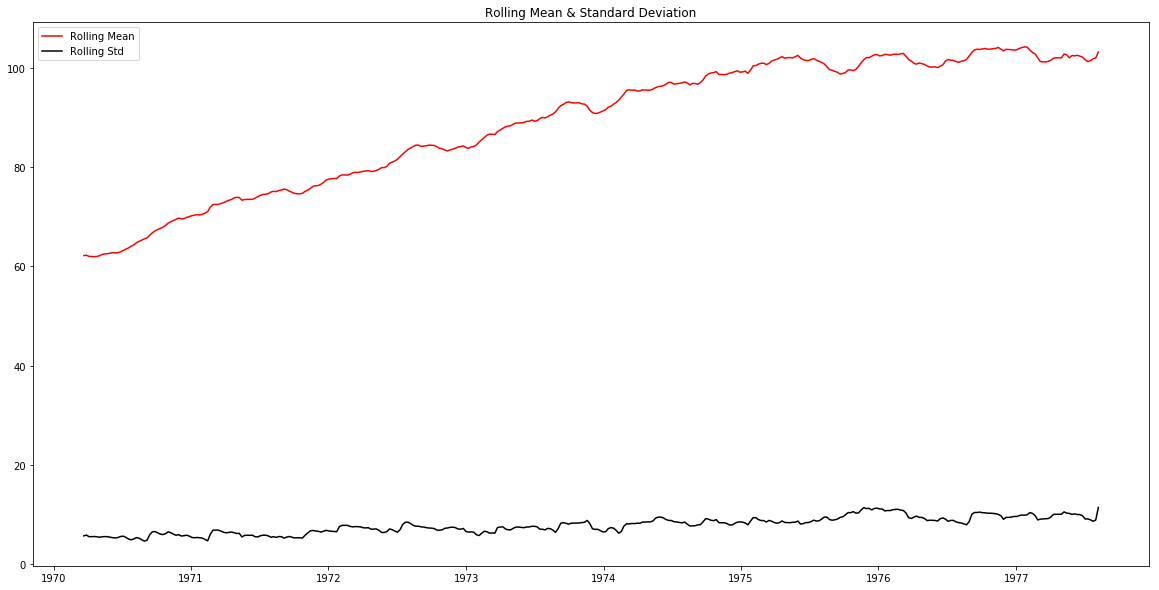

In [84]:
plt.figure(figsize=(20,10)) 
rolmean = pd.rolling_mean(y1, window=12)
mean = plt.plot(rolmean, color='red', label='Rolling Mean')

rolstd = pd.rolling_std(y1, window=12)
std = plt.plot(rolstd, color='black', label = 'Rolling Std')


plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
plt.show()


In [ ]:
### Estimating and Eliminating Trend

In [63]:
%matplotlib inline

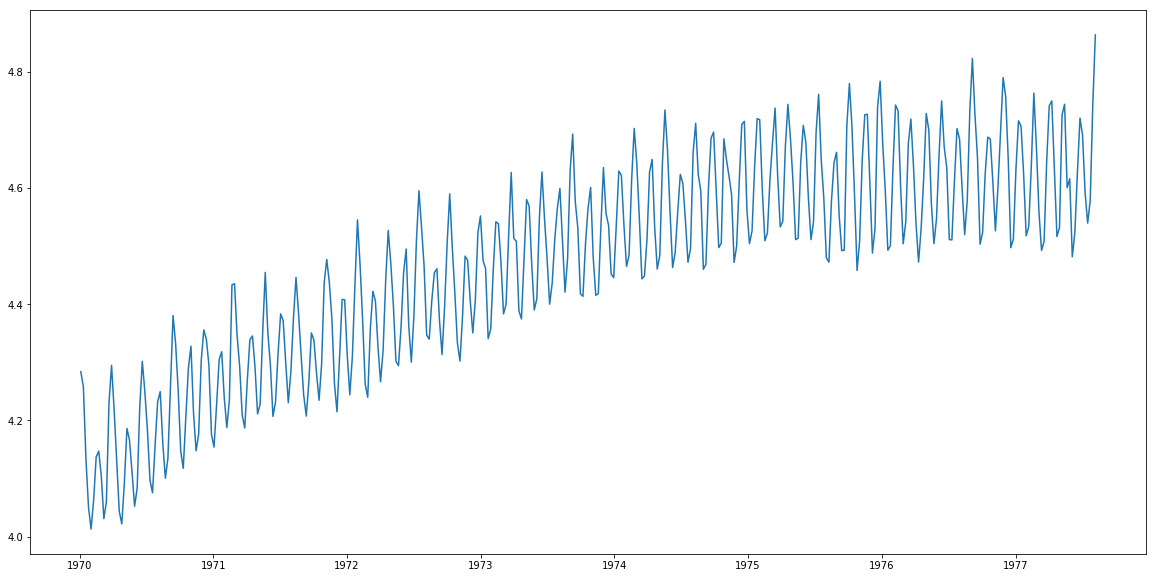

In [83]:
ts_log = np.log(y1)
plt.figure(figsize=(20,10)) 
plt.plot(ts_log)


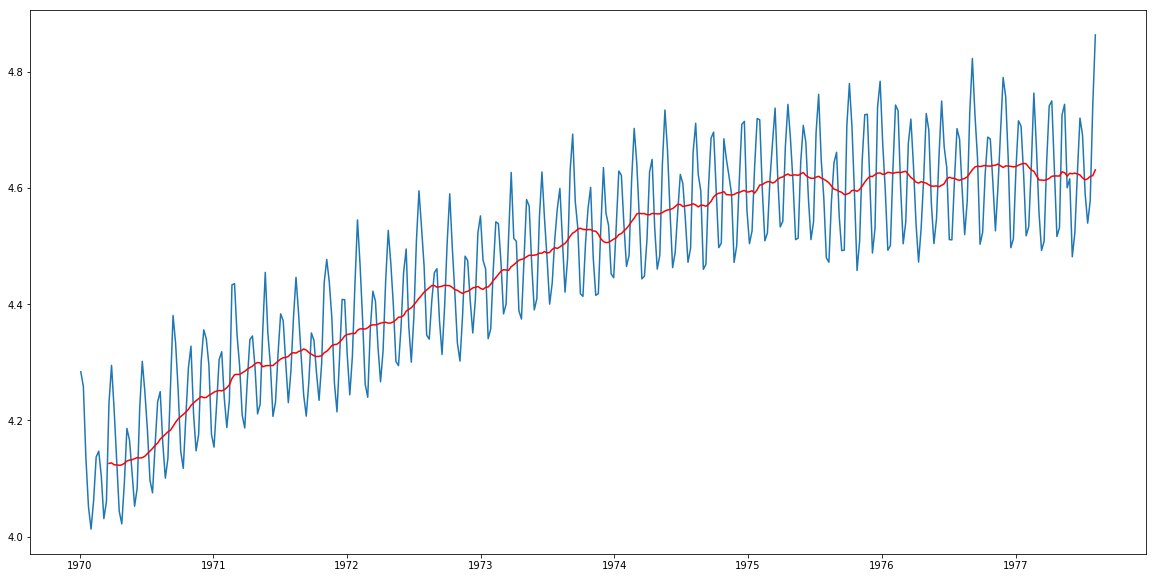

In [82]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.figure(figsize=(20,10)) 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [74]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(18)


,Value
1970-01-04,NaN
1970-01-11,NaN
1970-01-18,NaN
1970-01-25,NaN
1970-02-01,NaN
1970-02-08,NaN
1970-02-15,NaN
1970-02-22,NaN
1970-03-01,NaN
1970-03-08,NaN


In [75]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [76]:
ts_log_moving_avg_diff.head(18)

,Value
1970-03-22,0.103961
1970-03-29,0.167724
1970-04-05,0.095629
1970-04-12,0.007329
1970-04-19,-0.079115
1970-04-26,-0.101472
1970-05-03,-0.033363
1970-05-10,0.055963
1970-05-17,0.034639
1970-05-24,-0.021429


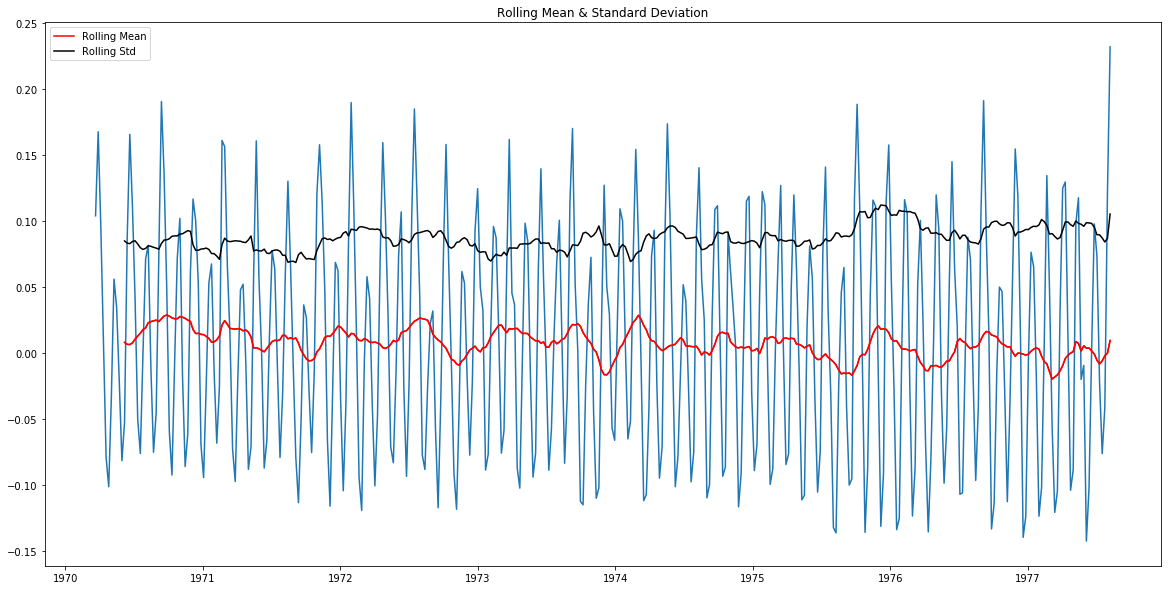

In [81]:
moving_avg = pd.rolling_mean(ts_log_moving_avg_diff,12)
plt.figure(figsize=(20,10)) 
plt.plot(ts_log_moving_avg_diff)
plt.plot(moving_avg, color='red')

rolmean = pd.rolling_mean(ts_log_moving_avg_diff, window=12)
mean = plt.plot(rolmean, color='red', label='Rolling Mean')

rolstd = pd.rolling_std(ts_log_moving_avg_diff, window=12)
std = plt.plot(rolstd, color='black', label = 'Rolling Std')


plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
plt.show()

In [ ]:
# Seasonal Decompose on log data

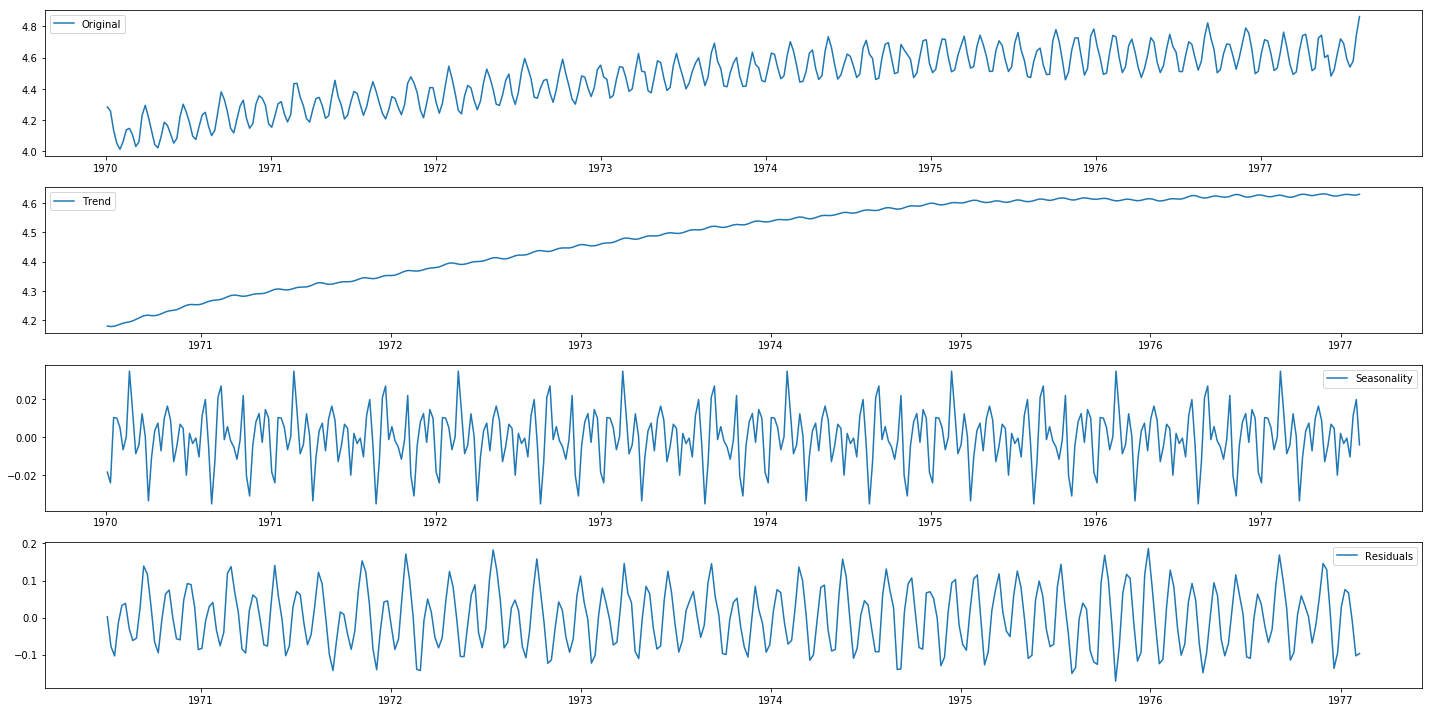

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10)) 
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [88]:
# Seasonal Data after moving Trend

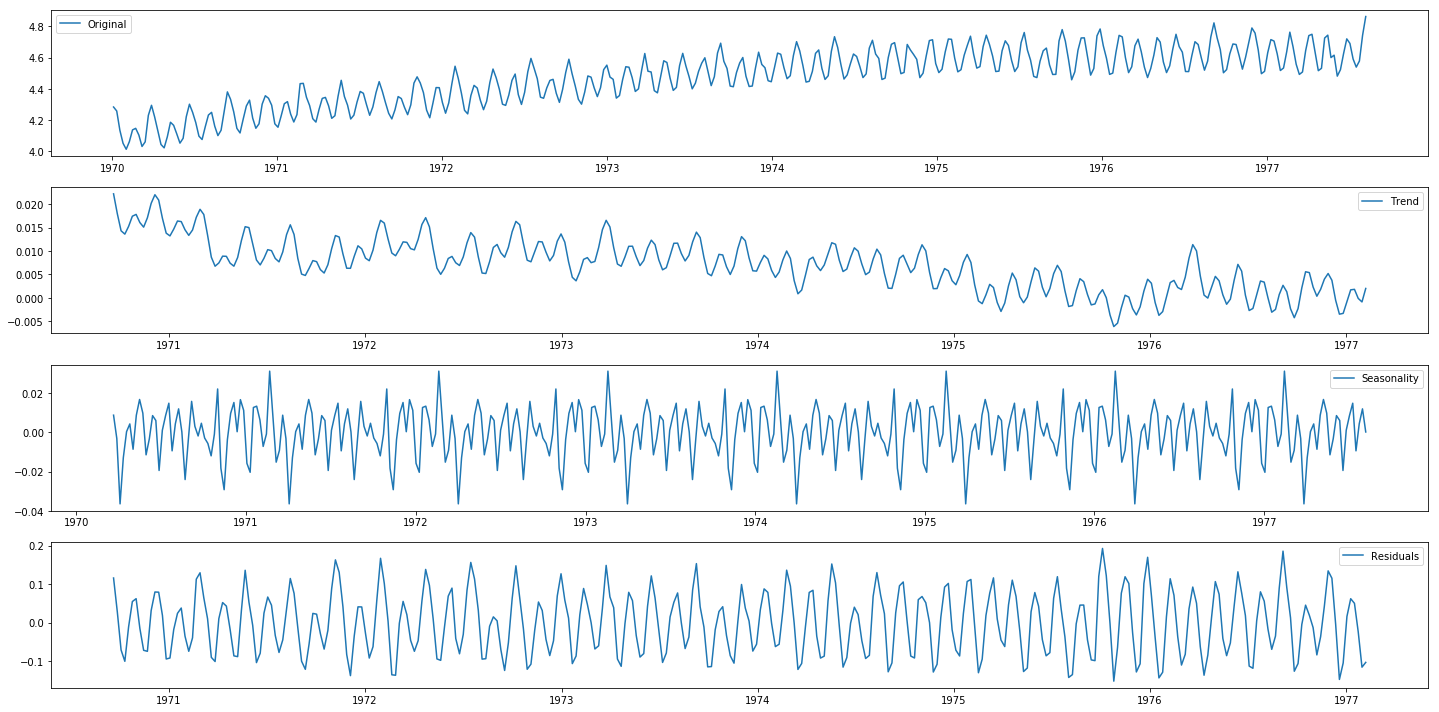

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_moving_avg_diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10)) 
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [90]:
## PRediction of time Series Analysis

In [91]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


In [94]:
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')

In [96]:
print(lag_acf)
print(lag_pacf)

[1.         0.88264617 0.68403481 0.58378384 0.65752265 0.81915569
 0.89384869 0.79955578 0.62349017 0.5402168  0.63102253 0.80746923
 0.89957586 0.79332254 0.603566   0.50785069 0.58421695 0.74190414
 0.81209339 0.72029328 0.54845066]
[ 1.          0.89343275 -0.46748474  0.6387088   0.55426028  0.44002174
  0.05018422 -0.11134783 -0.09171581  0.22953114  0.36309877  0.49520582
  0.44736726 -0.33285758 -0.0351138  -0.12210827  0.1381516   0.04324664
  0.02075731  0.03911334 -0.03548938]


Text(0.5,1,'Autocorrelation Function')

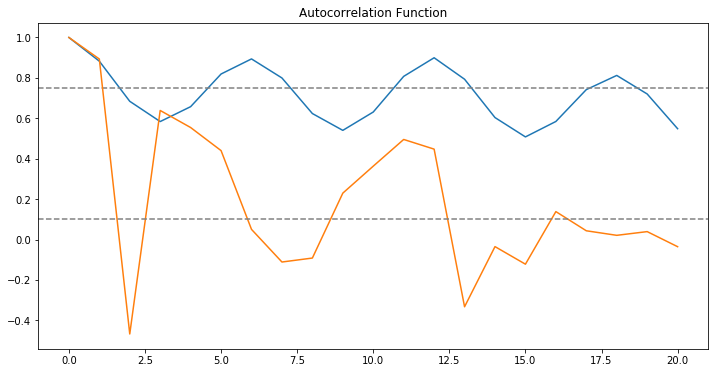

In [127]:
#plt.subplot(121) 

plt.figure(figsize=(12,6)) 
plt.plot(lag_acf)
plt.axhline(y=0.75,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.plot(lag_pacf)
plt.axhline(y=0.1,linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [114]:
from statsmodels.tsa.arima_model import ARIMA

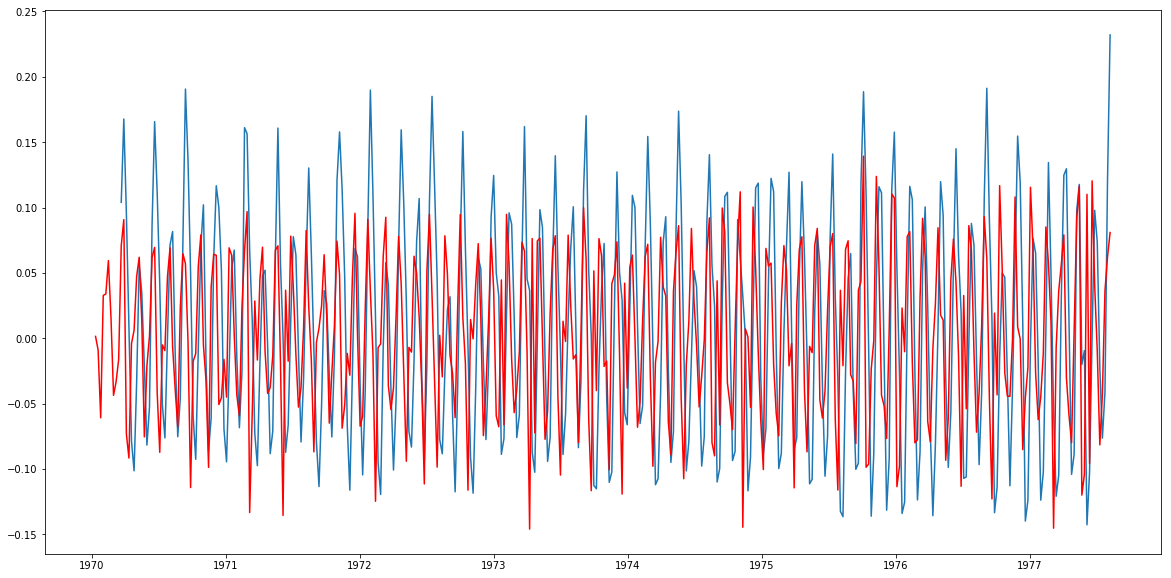

In [129]:
model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(20,10)) 
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_AR.fittedvalues, color='red')


In [133]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

1970-01-11    0.001391
1970-01-18   -0.008950
1970-01-25   -0.060876
1970-02-01    0.032760
1970-02-08    0.033835
Freq: W-SUN, dtype: float64


In [134]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [135]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1970-01-11    0.001391
1970-01-18   -0.007560
1970-01-25   -0.068436
1970-02-01   -0.035676
1970-02-08   -0.001841
Freq: W-SUN, dtype: float64


In [137]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

1970-01-04         NaN
1970-01-11    0.001391
1970-01-18   -0.007560
1970-01-25   -0.068436
1970-02-01   -0.035676
Freq: W-SUN, dtype: float64

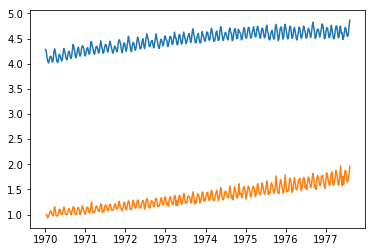

In [156]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_log)
plt.plot(predictions_ARIMA)

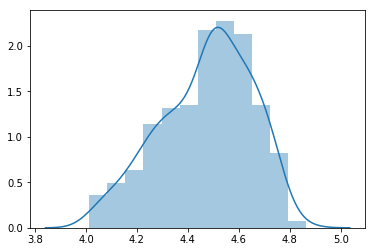

In [150]:
import seaborn as sns
sns.distplot(ts_log)


In [148]:
predictions_ARIMA = predictions_ARIMA.dropna()

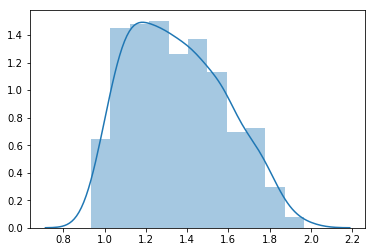

In [151]:
sns.distplot(predictions_ARIMA)